# Table of Contents
* [1. Einleitung](#1.-Einleitung)
	* [1.1 Thematischer Hintergrund](#1.1-Thematischer-Hintergrund)
	* [1.2 Inhalt](#1.2-Inhalt)
	* [1.3 Präsentationsform](#1.3-Präsentationsform)
* [2. Loading packages](#2.-Loading-packages)
* [3. Nennwerte der Synchronmaschine](#3.-Nennwerte-der-Synchronmaschine)
	* [3.1 Datenblattwerte](#3.1-Datenblattwerte)
	* [3.2 Abgeleitete Größen für den  Nennarbeitspunkt](#3.2-Abgeleitete-Größen-für-den--Nennarbeitspunkt)
* [4. Leistungsdiagramm der idealen Vollpolmaschine](#4.-Leistungsdiagramm-der-idealen-Vollpolmaschine)
	* [4.1 Thermische Grenzen des Statorstrom bei Nennstrom](#4.1-Thermische-Grenzen-des-Statorstrom-bei-Nennstrom)
	* [4.2 Thermische Grenzen des Rotorstroms bei Nennpolradspannung](#4.2-Thermische-Grenzen-des-Rotorstroms-bei-Nennpolradspannung)
	* [4.3 Stabilitätsgrenze](#4.3-Stabilitätsgrenze)
	* [4.4 Zeichnen des Leistungsdiagramms](#4.4-Zeichnen-des-Leistungsdiagramms)
	* [4.5 Koordinaten der Arbeitspunkte (AP)](#4.5-Koordinaten-der-Arbeitspunkte-%28AP%29)
* [5. Zusammenfassung](#5.-Zusammenfassung)


# 1. Einleitung

## 1.1 Thematischer Hintergrund

In Deutschland müssen dezentrale Erzeuger die Konformität mit den Netzanschlussbedingungen mit einem Zertifikat nachweisen. Zur Erlangung eines Zertifikats wird ein in den FGW Richtlinien TR3, T4 und TR8 beschriebener Prozess durchlaufen. Diese FGW Richtlinien werden seit 1992 in Arbeitskreisen durch Messinstitute, Beratungsfirmen, Zertifizierer sowie Hersteller von Windenergie- und PV-Anlagen sowie seit kurzem auch durch Hersteller von Blockheizkraftwerken (BHKW) entwickelt.

Aktuell werden die FGW Richtlinien vermehrt auf BHKWs angewendet. Im Unterschied zur Wechselrichterbasierten Technik von modernen Windenergie- und PV-Anlagen verwenden BHKWs eine andere Generatortechnologie. Für Stromerzeuger mit Diesel- und Gasmotoren wird im Allgemeinen ab einer Leistung von etwa 30 kW wird  ein geregelter, bürstenloser und direkt netzgekoppelter Synchrongenerator verwendet <a name="ref-1"/>[(Rosa, 2013)](#cite-Rosa2013), S.32.  

Das Verhalten von Synchrongeneratoren ist in der Literatur umfassend theoretisch beschrieben. 
Mithilfe von Literaturwissen können oft  bereits mit wenigen Datenblattwerten zertifizierungsrelevante, belastbare Aussagen bezüglich des Betriebsverhaltens getroffen werden. Diese Eigenschaft der Generatortechnologie von BHKWs soll im Folgenden benützt werden.

## 1.2 Inhalt

In dieser Arbeit wird auf Basis von Berechnungsverfahren aus der Fachliteratur das Leistungsdiagramm einer idealen Synchronmaschine in Vollpolausführung bestimmt.

## 1.3 Präsentationsform

Die gewählte Präsentationsform ist ein interaktives Jupyter Notebook (ehemals IPython Notebooks) https://jupyter.org/. Als besondere Präsentationsmöglichkeit bieten Jupyter Notebooks die Möglichkeit beschreibenden Text und Programmcode zu kombinieren sowie diese Elemente in einem Browser darzustellen bzw. auszuführen. Dieses Notebook verwendet Python-Code für die Berechnungen, sämtliche Berechnungsverfahren sind als Quellcode einsehbar. Python ist eine frei verfügbare Programmiersprache und bietet mit zahlreichen Packages vergleichbare Funktionalitäten wie z.B. Matlab.

# 2. Loading packages

In the code cell below packages used within this notebook are loaded. 

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display,HTML,Latex # Used to display widgets in the notebook
sp.init_printing(use_unicode=True,use_latex=True)
import ipywidgets as widgets #If not install run <pip install ipywidgets> in DOS command prompt (Anaconda distribution)
import time
print('Init done:', time.ctime() )
%matplotlib inline 

Init done: Fri Dec  4 13:29:08 2015


# 3. Nennwerte der Synchronmaschine

## 3.1 Datenblattwerte

Die Datenblattwerte werden entsprechend des Rechenbeispiels 6.1. (S.259) aus <a name="ref-2"/>[(Crastan)](#cite-Crastan) exemplarisch angenommen.

In [2]:
def build_widget_col(name,symbolUnit,value):
    w0=widgets.Text(description="",value=name ,color="black",disabled=True)
    w1=widgets.FloatText(value=value,description=symbolUnit,disabled=False)
    col=widgets.HBox([w0,w1])
    return col,value

col0,Sn=build_widget_col('Nennleistung:','$S_n$ [MVA]',10)
col1,Un=build_widget_col('Nennspannung:','$U_n=U_r$ [kV]',6)
col2,w=build_widget_col('Nennfrequenz (elektrisch):','$\omega_n$ [Hz]',50)
col3,Nn=build_widget_col('Nenndrehzahl:','$N_n$[RPM]',3000)
col4,If0=build_widget_col('Leerlauferregerstrom:','$I_{f0}$ [A]',100)
col5,Rf=build_widget_col('Rotorwiderstand:','$R_f$ [$\mathrm{\Omega}$]',0.3)
col6,xd=build_widget_col('Synchrone Längsreaktanz::','$x_d$ [pu]',1.8 )
col7,xq=build_widget_col('Synchrone Längsreaktanz:','$x_q$ [pu]',1.75)
col8,r=build_widget_col('Statorwiderstand:','$r$ [pu]',0.002)
col9,cosPhiN=build_widget_col('Nennleistungsfaktor:','$cos\\varphi_n$ [deg]',-0.85)                                                                                                
widgets.VBox([col0,col1,col2,col3,col4,col5,col6,col7,col8,col9])


## 3.2 Abgeleitete Größen für den  Nennarbeitspunkt

Aus den Datenblattwerten lassen sich gemäß des Rechenschemas aus <a name="ref-3"/>[(Crastan)](#cite-Crastan), S. 259 f., die Polradspannung und der Polradwinkel für den Nennarbeitspunkt sowie weitere Größen für den Nennarbeitspunkt  ermitteln. 

In [3]:
If0 =If0/1e3 #Convert to kA
UnLg =Un/np.sqrt(3) #Line to ground nominal voltage
Zn=Un**2/Sn
Xd= xd*Zn
Xq= xq*Zn
R =r*Zn
In=Sn/(np.sqrt(3)*Un)
phiN=np.arccos(abs(cosPhiN))
InCpx = In*np.exp(1j*phiN*np.sign(cosPhiN))

#Operating point values (set to nominal values)
U0LgCpx=Un/np.sqrt(3) #Note division by sqrt(3)
U0Lg=np.abs(U0LgCpx)
Icpx =InCpx
I=np.abs(Icpx)
cosPhi=cosPhiN
phi=np.arccos(abs(cosPhi))

wm =Nn/60 *2*np.pi
n  =w/wm #Relative or pu rotational speed (Crst 6.13)

EptCpx=U0LgCpx+R*Icpx+1j*Xq*Icpx
Ept=np.abs(EptCpx)
dlt=np.angle(EptCpx)
#in pu: eptCpx=U0cpx/(Un/np.sqrt(3)) + r*Icpx/In  +1j*xq*Icpx/In
#Check (CRST P259):testPu=1 + 0.002*1*np.exp(-1j*31.8*np.pi/180) + 1.75*1*np.exp(1j*(-31.8+90)*np.pi/180)
EpCpx=Ept+(Xd-Xq)*I*np.sin(phi+dlt)
Ep=np.abs(EpCpx)
Ud=U0Lg*np.sin(dlt)
Uq=U0Lg*np.cos(dlt)
Id=I*np.sin(dlt+phi)
Iq=I*np.cos(dlt+phi)

Xhfd= UnLg*np.sqrt(2)/If0
IfDc =Ep*np.sqrt(2)/Xhfd
UfDc =IfDc *Rf

Scpx = 3*U0LgCpx*np.conj(Icpx)
Ploss= 3* np.real(R/3*Icpx**2) #Stator losses  #Check R/3 ->Star connection?
Pei=np.real(Scpx)+Ploss
M=Pei/wm

display(Latex('$ {\mathrm{Errechnete \enspace  Nennwerte}}$ :'))
display(Latex('Nennstrom $I_n$: In= %.4g kA' %In))#http://grokbase.com/t/scipy.org/ipython-user/12bjv79v68/printing-a-string-and-latex-together-in-a-notebook
display(Latex('Bezugsimpedanz $Z_n$: Zn= %g $\Omega$' %Zn))
display(Latex('Reaktanz $X_d$: Xd= %.4f $\Omega$' %Xd))
display(Latex('Reaktanz $X_q$: Xq= %.4f $\Omega$' %Xq))

display(Latex('$E_{pt}$: Ept= %.4f kV (%.2f   pu) '%(Ept,Ept/UnLg)))
display(Latex('Polradwinkel $\delta$: dlt= %.2f $^{\circ}$' %(dlt*180/np.pi)))
display(Latex('Polradspannung $E_p$: Ep= %.4f kV (%.2f   pu)'%(Ep,Ep/UnLg)))
display(Latex('Amplitude der Polradspannung $\hat{E}_p$: EpInst= %.4f kV (%.2f   pu)'%(Ep*np.sqrt(2),
                                                                                   Ep*np.sqrt(2)/UnLg)))
display(Latex('d-Komponente der Statorspannung: $U_d$: Ud= %.4f kV (%.2f   pu)'%(Ud,Ud/UnLg)))
display(Latex('q-Komponente der Statorspannung: $U_q$: Uq= %.4f kV (%.2f   pu)'%(Uq,Uq/UnLg)))
display(Latex('d-Komponente der Statorströme: $I_d$: Id= %.4f kA (%.2f   pu)'%(Id,Id/In)))
display(Latex('q-Komponente der Statorströme: $I_q$: Iq= %.4f kA (%.2f   pu)'%(Iq,Iq/In)))

display(Latex('Kopplungsreaktanz: $X_{hfd}$: Xhfd= %.4f $\Omega$' %Xhfd))
display(Latex('Erregger-Gleichstrom: $I_f$: Ifd= %.4f A (DC)'%(IfDc*1e3)))
display(Latex('Erregger-Gleichspannung: $U_f$: Ifd= %.4f V (DC)'%(UfDc*1e3)))
display(Latex('Erregger-Verlustleistung: $P_f$: Pf= %.4f kW (DC)'%(UfDc*IfDc*1e3))) #*3?

display(Latex('Innere elektrische Leistung: $P_{ei}$: Pei= %.4f MW (%.2f   pu)'%(Pei,Pei/Sn)))
display(Latex('Inneres (?) Drehmoment: $M$: M= %.4f knm '%(M*1e3)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 4. Leistungsdiagramm der idealen Vollpolmaschine

Das Leistungsdiagramm ("PQ-Diagramm") beschreibt die Grenzen des Blindleistungsstellbereichs im stationären Fall. Die Grenzen des Leistungsdiagramms werden durch unterschiedliche Grenzen gebildet. Die jeweilgen Grenzen werden im Folgenden kurz betrachtet und anschließend im Leistungsdiagramm dargestellt.  

## 4.1 Thermische Grenzen des Statorstrom bei Nennstrom

Die Thermische Grenzen des Statorstrom bei Nennstrom wird durch die Nennleistung definiert. Die Grenzen im Leistungsdiagramm entsprechen einem Kreis um den Ursprung mit Radius gleich der Nennleistung. In expliziter Form kann dieser Kreis als zwei Wurzelfunktionen beschrieben werden.

In [4]:
QmaxStatAFun=lambda P:    np.sqrt(Sn**2-P**2)
QmaxStatBFun=lambda P: -1*np.sqrt(Sn**2-P**2)

## 4.2 Thermische Grenzen des Rotorstroms bei Nennpolradspannung

Die Herleitung der Formeln für die thermische Grenzen des Rotorstroms bei Nennpolradspannung beginnt mit den Formeln aus  <a name="ref-4"/>[(Crastan)](#cite-Crastan), S. 274. Für die Wirk- und Blindleistungsabgabe der idealen Schenkelpolmaschine gilt:

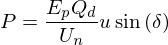

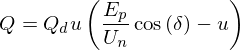

In [5]:
Psym,Qsym,uSym,QdSym,EpSym,UnSym,dltSym=sp.symbols(r"P,Q,u,Q_d,E_p,U_n,\delta")
eq0= uSym*QdSym*EpSym/UnSym *sp.sin(dltSym) -Psym  #  P(dlt) term (Crst 6.94)
eq1= uSym*QdSym*(EpSym/UnSym *sp.cos(dltSym) -uSym)-Qsym # Q(dlt) term (Crst 6.94)
display(sp.Eq(Psym,eq0+Psym))
display(sp.Eq(Qsym,eq1+Qsym))

In diesen Ausdrücken ist $\delta$ der Polradwinkel und $Q_d$ die sogenannte charakteristische Blindleistung mit $Q_d=\frac{3U^2_r}{X_d}$. Die per unit Statorspannung $u$ wird gleich der Nennspannung, also zu 1 pu angenommen.

In [6]:
Qd=3*Un**2/Xd #(CRST 6.90)
u=1

Die obigen Ausdrücke für $P(\delta)$ und $Q(\delta)$ können jeweils nach $\delta$ aufgelöst werden und ineinander eingesetzt werden um $\delta$ zu ersetzen. Das Ergebnis sind jeweils zwei Terme für $P(Q)$ und $Q(P)$.

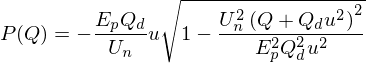

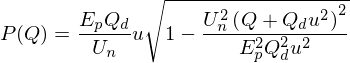

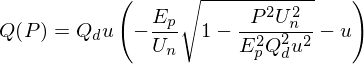

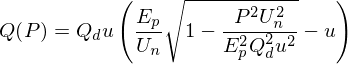

In [7]:
eq2=sp.solve(eq1,dltSym) #Solve Q(dlt) for load angle delta
eq3a=eq0.subs(dltSym,eq2[0]) #Insert first solution for dlt in P(dlt) 
eq3b=eq0.subs(dltSym,eq2[1]) #Insert second solution for dlt in P(dlt)
display(sp.Eq(Psym(Qsym),eq3a+Psym))#Show 1. term for P(Q) with elimiminated delta
display(sp.Eq(Psym(Qsym),eq3b+Psym))#Show 2. term for P(Q) with elimiminated delta

eq4=sp.solve(eq0,dltSym) #Solve P(dlt) for load angle delta
eq5a=eq1.subs(dltSym,eq4[0]) #Insert first solution for dlt in Q(dlt) 
eq5b=eq1.subs(dltSym,eq4[1]) #Insert second solution for dlt in Q(dlt)
display(sp.Eq(Qsym(Psym),eq5a+Qsym))#Show 1. term for Q(P) with elimiminated delta
display(sp.Eq(Qsym(Psym),eq5b+Qsym))#Shwo 2. term for Q(P) with elimiminated delta

In <a name="ref-5"/>[(Crastan)](#cite-Crastan), S. 274 f. werden für die Herleitung des Leistungsdiagramms die Eigenschaften ähnlicher Dreiecke benützt. Davon abweichend wurden an dieser Stelle analytischen Ausdrücken verwendet. 

## 4.3 Stabilitätsgrenze

Entsprechend den angegeben Termen beschreibt Q(P) den Blindleistungsstellbereichs in Abhängigkeit von P. 
Aus Stabilitätsgründen wird der Blindleistungsstellbereichs jedoch weiter eingeschränkt. Der natürliche Stabilitätsbereich für den Polradwinkel liegt zwischen 0 und 90°. Bei Mitbetrachtung des Spannungsreglers kann der natürliche Stabilitätsbereich um einen künstlichen Stabilitätsbereich mit Polradwinkeln >90° erweitert werden. Dieser Fall wird hier jedoch nicht weiter verfolgt. Bei Annahme eines maximalen Polradwinkel von 90° folgt aus obigem Ausdruck für die Begrenzung der minimalen Blindleistung aus Stabilitätsgründen:

$Q = Q_{d} u \left(\frac{E_{p}}{U_{n}} \cos{\left (\delta \right )} - u\right)
~~\underrightarrow{\delta=90°}~~ 
Q_{min}= -u^2Q_d$

In [8]:
QminMaxEqs =  sp.solve(eq3a+Psym,Qsym) #Solve P(Q)=0 resulting in two solutions for Qmin and Qmax
Qmin2 =-u**2*Qd

## 4.4 Zeichnen des Leistungsdiagramms

Für das Zeichnen des Leistungsdiagramms ist es notwendig symbolische durch numerische Werte zu ersetzen.

In [9]:
eq6a=eq3a.subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)])
eq6b=eq3b.subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)])
eq7a=eq5a.subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)])
eq7b=eq5b.subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)])

PaFun=sp.lambdify(Qsym,(eq6a+Psym),"numpy") #http://docs.sympy.org/dev/tutorial/basic_operations.html
PbFun=sp.lambdify(Qsym,(eq6b+Psym),"numpy") 
QaFun=sp.lambdify(Psym,(eq7a+Qsym),"numpy") 
QbFun=sp.lambdify(Psym,(eq7b+Qsym),"numpy") 

Qmin =float( QminMaxEqs[0].subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)]) )
Qmax =float( QminMaxEqs[1].subs([(UnSym,Un),(QdSym,Qd),(EpSym,Ep),(UnSym,Un),(uSym,u)]) )

Abschließend wird das Leistungsdiagramm in Anlehnung an <a name="ref-4"/>[(Crastan)](#cite-Crastan), S. 275, Fig. 6.62 gezeichnet.

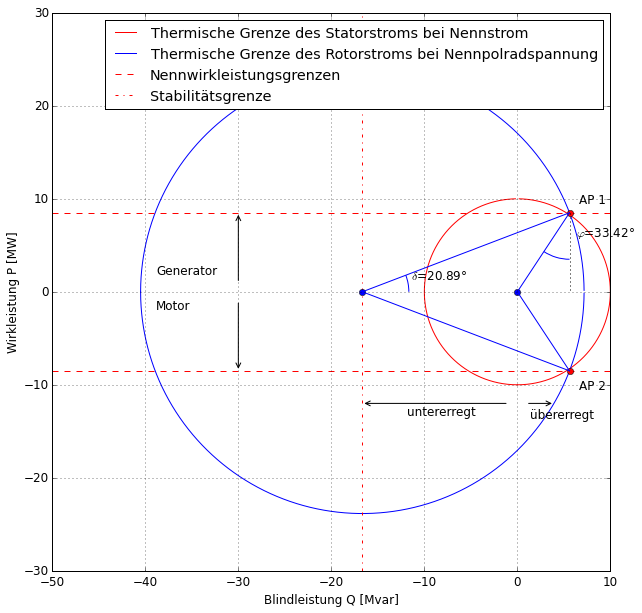

In [12]:
from  matplotlib.patches import Arc 
#Angle plottig fumction based on contribution of vraghav93 http://stackoverflow.com/questions/25227100/best-way-to-plot-an-angle-between-two-lines-in-matplotlib
def get_angle_plot(line1, line2, offset = 1, color = None, len_x_axis = 10, len_y_axis = 10):
    l1xy = line1.get_xydata()
    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][1]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(np.degrees(np.arctan(slope1))) # Taking only the positive angle
    l2xy = line2.get_xydata()
    # Angle between line2 and x-axis
    slope2 = (l2xy[1][1] - l2xy[0][1]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(np.degrees(np.arctan(slope2)))
    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)
    angle = theta2 - theta1
    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.
    origin=l2xy[0]
    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

def get_angle_text(angle_plot):
   angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
   angle = "%0.2f"%float(angle)+u"\u00b0" # Display angle upto 2 decimal places
   # Get the vertices of the angle arc
   vertices = angle_plot.get_verts()
   # Get the midpoint of the arc extremes
   x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
   y_width = (vertices[0][1] + vertices[-1][1]) / 2.0
   #print x_width, y_width
   separation_radius = max(x_width/2.0, y_width/2.0)

   return [ x_width + separation_radius, y_width + separation_radius, angle] 


plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='none', edgecolor='k')
plt.axis('equal')
ax = plt.gca()

Parr = np.linspace(-Sn,Sn,num=10000,endpoint=False)
plt.plot(QmaxStatAFun(Parr),Parr,'r-',label='Thermische Grenze des Statorstroms bei Nennstrom')
plt.plot(QmaxStatBFun(Parr),Parr,'r-')

Qarr = np.linspace(Qmin,Qmax,num=100000,endpoint=False) #http://scicomp.stackexchange.com/questions/13021/python-package-for-adaptive-function-plotting
plt.plot(Qarr,PaFun(Qarr),'b-',label='Thermische Grenze des Rotorstroms bei Nennpolradspannung')
plt.plot(Qarr,PbFun(Qarr),'b-')

Pn=abs(Sn*cosPhiN) #Move
plt.plot(ax.get_xlim(),(-Pn,-Pn),'r--',label='Nennwirkleistungsgrenzen')
plt.plot(ax.get_xlim(),(Pn,Pn),'r--')

plt.plot((Qmin2,Qmin2),ax.get_ylim(),'r-.',label='Stabilitätsgrenze')

OpPmaxQmin=(Qmin2,Pn)
OpPminQmin=(Qmin2,-Pn)
OpPmaxQmax=(QbFun(Pn),Pn)
OpPminQmax=(QbFun(-Pn),-Pn)

plt.plot(#OpPmaxQmin[0],OpPmaxQmin[1],'ro',
         #OpPminQmin[0],OpPminQmin[1],'ro',
         OpPmaxQmax[0],OpPmaxQmax[1],'ro', 
         OpPminQmax[0],OpPminQmax[1],'ro',
         0,0,'bo', Qmin2,0,'bo')

plt.text(OpPmaxQmax[0]+1,OpPmaxQmax[1]+1,'AP 1')
plt.text(OpPminQmax[0]+1,OpPminQmax[1]-2,'AP 2')

plt.annotate( '', xy=(-30, 1), xycoords='data',xytext=(-30, Pn),textcoords='data', arrowprops={'arrowstyle': '<-'})
plt.annotate( 'Generator', xy=(-30-5, 1), xycoords='data',xytext=(-30-5, Pn), textcoords='offset points')
             
plt.annotate( '', xy=(-30, -1), xycoords='data',xytext=(-30, -Pn),textcoords='data', arrowprops={'arrowstyle': '<-'})
plt.annotate( 'Motor', xy=(-30-5, -1), xycoords='data',xytext=(-30-5, -Pn), textcoords='offset points')
             
plt.annotate( '', xy=(-1,-12), xycoords='data',xytext=(Qmin2,-12),textcoords='data', arrowprops={'arrowstyle': '<-'})
plt.annotate( 'untererregt', xy=(-10, -12), xycoords='data',xytext=(Qmin2,-12), textcoords='offset points')

plt.annotate( '', xy=(1,-12), xycoords='data',xytext=(QbFun(-12),-12),textcoords='data', arrowprops={'arrowstyle': '<-'})
plt.annotate( 'übererregt', xy=(1,-12-1.5), xycoords='data',xytext=(QbFun(-12),-1), textcoords='offset points')

plt.legend()

line1 =plt.Line2D([Qmin2,OpPmaxQmax[0]],[0,OpPmaxQmax[1]], linewidth=1, linestyle = "-", color="blue")
line2 =plt.Line2D([OpPmaxQmax[0],0],[OpPmaxQmax[1],0], linewidth=1, linestyle = "-", color="blue")
line3 =plt.Line2D([Qmin2,OpPminQmax[0]],[0,OpPminQmax[1]], linewidth=1, linestyle = "-", color="blue")
line4 =plt.Line2D([0,OpPminQmax[0]],[0,OpPminQmax[1]], linewidth=1, linestyle = "-", color="blue")

ax.add_line(line1)
ax.add_line(line2)
ax.add_line(line3)
ax.add_line(line4)

line5 =plt.Line2D([Qmin2,8],[0,0], linewidth=1, linestyle = "-", color='red')#Invisble help line for angle plotting
angle_plot = get_angle_plot(line1,line5)
angle_text = get_angle_text(angle_plot) # Gets the arguments to be passed to ax.text as a list to display the angle value besides the arc
ax.add_patch(angle_plot) # To display the angle arc
ax.text(angle_text[0],angle_text[1],r"$\delta$="+ angle_text[2]) # To display the angle value

line6 =plt.Line2D([OpPmaxQmax[0],OpPmaxQmax[0]],[OpPmaxQmax[1],0], linewidth=1, linestyle = ":", color='black')#Visible help line for angle plotting
ax.add_line(line6)
angle_plot = get_angle_plot(line2,line6,offset =-1)
angle_text = get_angle_text(angle_plot) # Gets the arguments to be passed to ax.text as a list to display the angle value besides the arc
ax.add_patch(angle_plot) # To display the angle arc
ax.text(angle_text[0],angle_text[1],r"$\varphi$="+ angle_text[2]) # To display the angle value

ax.set_xlabel('Blindleistung Q [Mvar]')
ax.set_ylabel('Wirkleistung P [MW] ')
plt.grid()  
font = {'weight' : 'normal','size':12}
plt.rc('font', **font) #Change the font size for all plot elements #http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.show()

## 4.5 Koordinaten der Arbeitspunkte (AP)

Noch nicht fertig.

In [11]:
import pandas as pd
df = pd.DataFrame({"AP 1":[1,2,3], "AP 2":[6,4,3], "z":["testing","pretty","tables"], "f":[0.023432, 0.234321,0.5555]})
#df

# 5. Zusammenfassung


Die Vorteile des hier vorgestellten Ansatzes liegen zum einen darin dass bereits aus wenigen Datenblattwerten  zertifizierungsrelevante Aussagen getroffen werden können und zum anderen in der Anpassbarkeit sowie Quelloffenheit der Rechenschritte. Es wäre vorstellbar entsprechende Zertifizierungsschritte mit den hier getätigten Aussagen zu ergänzen. 

# References

<a name="cite-Rosa2013"/><sup>[^](#ref-1) </sup>Rosa, Andreas. 2013. _Projektierung von Ersatzstromaggregaten_. [URL](http://www.amazon.de/Projektierung-von-Ersatzstromaggregaten-Stromerzeugungsaggregaten-VDE-Schriftenreihe/dp/3800735288)

<a name="cite-Crastan"/><sup>[^](#ref-2) [^](#ref-3) </sup>Crastan, Valentin. 2012. _Elektrische Energieversorgung 1: Netzelemente, Modellierung, station\"{ares Verhalten, Bemessung, Schalt- und Schutztechnik_. [URL](http://www.amazon.de/gp/product/3642223451/ref=pd\_lpo\_sbs\_dp\_ss\_2?pf\_rd\_p=556245207\&pf\_rd\_s=lpo-top-stripe\&pf\_rd\_t=201\&pf\_rd\_i=3540694390\&pf\_rd\_m=A3JWKAKR8XB7XF\&pf\_rd\_r=07AVYT6MPQ5MC8PPZNWB)


